In [1]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [3]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_period', 'koi_slogg', 'koi_srad', 'ra', 'dec', 'koi_kepmag']]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [4]:
X = selected_features
y = df[['koi_disposition']]
print(X.shape, y.shape)

(6991, 6) (6991, 1)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,koi_period,koi_slogg,koi_srad,ra,dec,koi_kepmag
6122,6.768901,4.327,1.125,294.40472,39.351681,14.725
6370,0.733726,4.578,0.797,284.50391,42.463860,15.770
2879,7.652707,4.481,0.963,295.50211,38.983540,13.099
107,7.953547,4.536,0.779,291.15878,40.750271,15.660
29,4.959319,4.359,1.082,292.16705,48.727589,15.263


In [6]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train=label_encoder.transform(y_train)
encoded_y_test=label_encoder.transform(y_test)

print(X.shape, y.shape)

(6991, 6) (6991, 1)


C:\Users\brand\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [7]:
# Scale your data

X_scaler = MinMaxScaler().fit(X)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



k: 1, Train/Test Score: 1.000/0.500
k: 3, Train/Test Score: 0.719/0.486
k: 5, Train/Test Score: 0.657/0.486
k: 7, Train/Test Score: 0.628/0.495
k: 9, Train/Test Score: 0.610/0.497
k: 11, Train/Test Score: 0.587/0.495
k: 13, Train/Test Score: 0.582/0.498
k: 15, Train/Test Score: 0.573/0.502
k: 17, Train/Test Score: 0.570/0.510
k: 19, Train/Test Score: 0.570/0.516


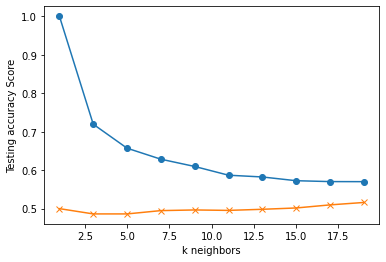

In [9]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, encoded_y_train)
    train_score = knn.score(X_train_scaled, encoded_y_train)
    test_score = knn.score(X_test_scaled, encoded_y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [10]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train_scaled, encoded_y_train)
print('k=19 Test Acc: %.3f' % knn.score(X_test_scaled, encoded_y_test))

k=19 Test Acc: 0.516


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [ ]:
# Create the GridSearchCV model
from sklearn.svm import SVC
classifier= SVC(kernel='linear')
classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid= {'C': [1,5,10,50],
            'gamma': [0.0001, 0.005, 0.001, 0.005]}
grid = GridSearchCV (classifier, param_grid, verbose = 3)

In [ ]:
# Train the model with GridSearch
grid.fit(X_train, encoded_y_train)

In [ ]:
print(grid.best_params_)


In [ ]:
print(grid.best_score_)

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'Brandy_Knust.sav'
joblib.dump(DecisionTree_RandomForest, filename)